# Report Advanced Database final project

## Introduction

## Database




The tables to support the project:

1. puzzles
2. solutions
3. tetrominoes

Representation of a tetromino in a postgis database - the advantage of this representation is to be able to use QGIS software to evaluate/simulate solutions.

Upright T:

SELECT ST_Collect(ARRAY[ \
  ST_MakeEnvelope(0, 1, 1, 2, 0), \
  ST_MakeEnvelope(1, 1, 2, 2, 0), \
  ST_MakeEnvelope(2, 1, 3, 2, 0), \
  ST_MakeEnvelope(1, 0, 2, 1, 0) \
]); \
🟩🟩🟩 \
⬜🟩⬜ 

Upside-down T:

SELECT ST_Collect(ARRAY[ \
  ST_MakeEnvelope(1, 1, 2, 2, 0), \
  ST_MakeEnvelope(0, 0, 1, 1, 0), \
  ST_MakeEnvelope(1, 0, 2, 1, 0), \
  ST_MakeEnvelope(2, 0, 3, 1, 0) \
]); \
⬜🟩⬜ \
🟩🟩🟩 

Left-facing T:

SELECT ST_Collect(ARRAY[ \
  ST_MakeEnvelope(1, 0, 2, 1, 0), \
  ST_MakeEnvelope(1, 1, 2, 2, 0), \
  ST_MakeEnvelope(1, 2, 2, 3, 0), \
  ST_MakeEnvelope(0, 1, 1, 2, 0) \
]); \
⬜🟩 \
🟩🟩 \
⬜🟩

Right-facing T:

SELECT ST_Collect(ARRAY[ \
  ST_MakeEnvelope(0, 0, 1, 1, 0), \
  ST_MakeEnvelope(0, 1, 1, 2, 0), \
  ST_MakeEnvelope(0, 2, 1, 3, 0), \
  ST_MakeEnvelope(1, 1, 2, 2, 0) \
]); \
🟩⬜ \
🟩🟩 \
🟩⬜





Representation of all 19 possibile tetrominoes with orientations: \
It will be used with the following expression:\
        ST_GeomFromText('POLYGON((...))',4326)


🟦 I Tetromino \
I_h: POLYGON ((0 1, 1 1, 2 1, 3 1, 4 1, 4 0, 3 0, 2 0, 1 0, 0 0, 0 1))

I_v: POLYGON ((0 0, 0 1, 0 2, 0 3, 0 4, 1 4, 1 3, 1 2, 1 1, 1 0, 0 0))

🟨 O Tetromino \
O: POLYGON ((0 1, 0 2, 1 2, 2 2, 2 1, 2 0, 1 0, 0 0, 0 1))

🟪 T Tetromino \
T_u: POLYGON ((2 0, 1 0, 1 1, 0 1, 0 2, 1 2, 2 2, 3 2, 3 1, 2 1, 2 0))

T_d: POLYGON ((0 1, 1 1, 1 2, 2 2, 2 1, 3 1, 3 0, 2 0, 1 0, 0 0, 0 1))

T_l: POLYGON ((2 0, 1 0, 1 1, 0 1, 0 2, 1 2, 1 3, 2 3, 2 2, 2 1, 2 0))

T_r: POLYGON ((0 0, 0 1, 0 2, 0 3, 1 3, 1 2, 2 2, 2 1, 1 1, 1 0, 0 0))

🟥 S Tetromino \
S_h: POLYGON ((1 1, 0 1, 0 2, 1 2, 2 2, 2 1, 3 1, 3 0, 2 0, 1 0, 1 1))

S_v: POLYGON ((0 0, 0 1, 0 2, 1 2, 1 3, 2 3, 2 2, 2 1, 1 1, 1 0, 0 0))

🟧 Z Tetromino \
Z_h: POLYGON ((0 1, 1 1, 1 2, 2 2, 3 2, 3 1, 2 1, 2 0, 1 0, 0 0, 0 1))

Z_v: POLYGON ((2 0, 1 0, 1 1, 0 1, 0 2, 0 3, 1 3, 1 2, 2 2, 2 1, 2 0))

🟫 J Tetromino \
J_u: POLYGON ((0 0, 0 1, 0 2, 1 2, 2 2, 3 2, 3 1, 2 1, 1 1, 1 0, 0 0))

J_r: POLYGON ((1 0, 1 1, 1 2, 0 2, 0 3, 1 3, 2 3, 2 2, 2 1, 2 0, 1 0))

J_d: POLYGON ((0 1, 1 1, 2 1, 2 2, 3 2, 3 1, 3 0, 2 0, 1 0, 0 0, 0 1))

J_l: POLYGON ((0 1, 0 2, 0 3, 1 3, 1 2, 1 1, 2 1, 2 0, 1 0, 0 0, 0 1))

🟩 L Tetromino \
L_u: POLYGON ((2 1, 1 1, 0 1, 0 2, 1 2, 2 2, 3 2, 3 1, 3 0, 2 0, 2 1))

L_r: POLYGON ((0 1, 1 1, 1 2, 1 3, 2 3, 2 2, 2 1, 2 0, 1 0, 0 0, 0 1))

L_d: POLYGON ((0 1, 0 2, 1 2, 1 1, 2 1, 3 1, 3 0, 2 0, 1 0, 0 0, 0 1))

L_l: POLYGON ((0 0, 0 1, 0 2, 0 3, 1 3, 2 3, 2 2, 1 2, 1 1, 1 0, 0 0))

## Initial puzzles examples

In [3]:
import sys
sys.path.append("/workspaces/project_tadb_fcup_20242025")

import matplotlib.pyplot as plt
from utils.plot import plot_geometry
from utils.plot import plot_solutions
from utils.db import connect_db

IndexError: index 4 is out of bounds for axis 0 with size 4

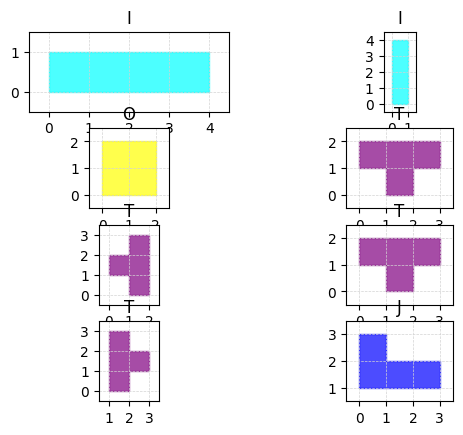

In [4]:
conn = connect_db()
cur = conn.cursor()

query = """
SELECT 
    letter
    , color
    , ST_AsText(geom) 
FROM tetrominoes; 
"""

cur.execute(query)
tetromino = cur.fetchall()

fig, ax = plt.subplots(4,2)

i = 0
num_cols = 2
while i < len(tetromino):
    row = i // num_cols
    col = i % num_cols
    plot_geometry( ax=ax[row, col], geom=tetromino[i][2], color=tetromino[i][1],title=tetromino[i][0] )
    i += 1

plt.show()

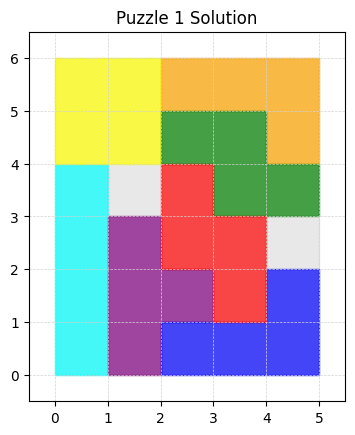

In [ ]:
plot_solutions( puzzle_id=1, title="Puzzle 1 Solution", solution_id=1 )
plt.show()

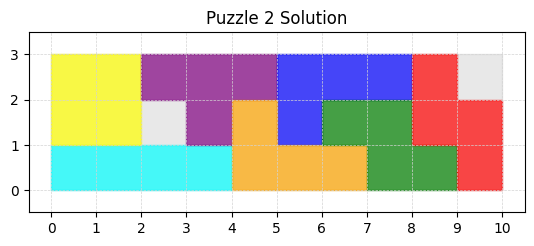

In [ ]:
plot_solutions( puzzle_id=2, title="Puzzle 2 Solution", solution_id=1 )
plt.show()

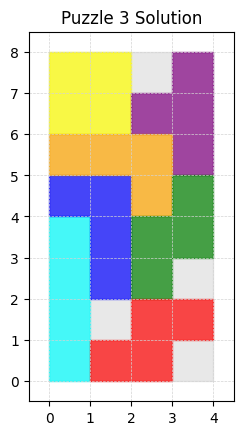

In [ ]:
plot_solutions( puzzle_id=3, title="Puzzle 3 Solution", solution_id=1 )
plt.show()